In [18]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 907 kB 4.2 MB/s 


In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.2 MB/s 
     |████████████████████████████████| 9.9 MB 17.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [5]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set(rc={'figure.figsize':(15, 7)})
plt.rcParams['figure.figsize'] = (15, 7)
warnings.filterwarnings('ignore')

In [6]:
# Загрузка данных
import yfinance as yf

prices = yf.download('googl', start='2017-01-01', end='2021-12-31', interval='1d')['Adj Close']
prices

[*********************100%***********************]  1 of 1 completed


Date
2017-01-03     40.400501
2017-01-04     40.388500
2017-01-05     40.651001
2017-01-06     41.260502
2017-01-09     41.359001
                 ...    
2021-12-23    146.916504
2021-12-27    147.906494
2021-12-28    146.686996
2021-12-29    146.654999
2021-12-30    146.200500
Name: Adj Close, Length: 1258, dtype: float64

In [7]:
# Настроим частоту данных и проверим пропуски
prices = prices.asfreq('B', method='ffill')
prices.isna().sum()

0

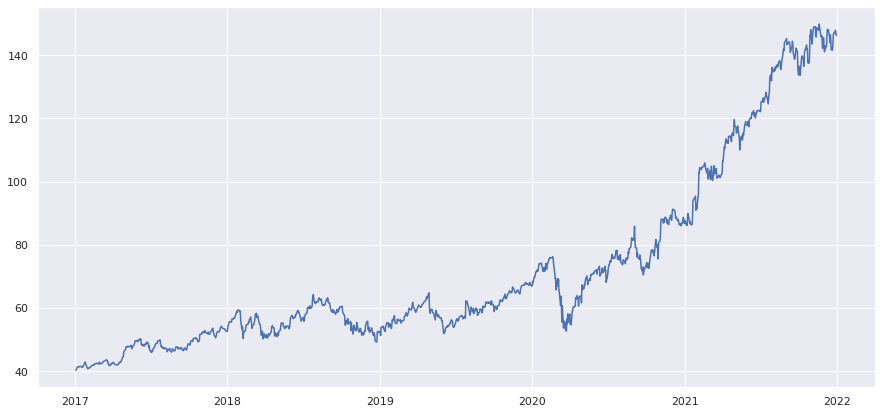

In [8]:
# Визуализируем данные
plt.plot(prices)
plt.show()

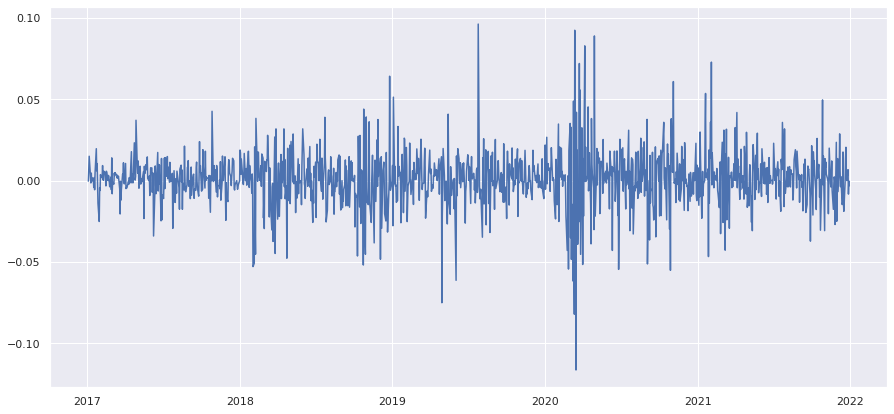

In [9]:
# Вернем приросты и также взглянем на график доходностей
returns = prices.pct_change().dropna()

plt.plot(returns)
plt.show()

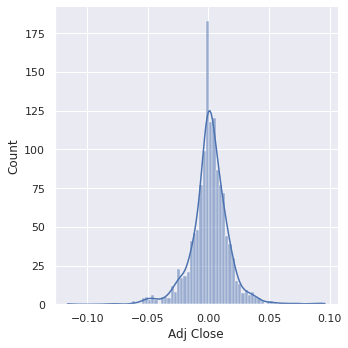

In [10]:
# Взглянем на гистограмму доходностей для первичной оценки нормальности
sns.displot(returns, kde=True)
plt.show()

In [11]:
# Проверим ряд на стационарность
from statsmodels.tsa.stattools import adfuller

print('Ряд', str('стационарен.' if adfuller(returns)[1] < 0.05 else 'нестационарен.'))

Ряд стационарен.


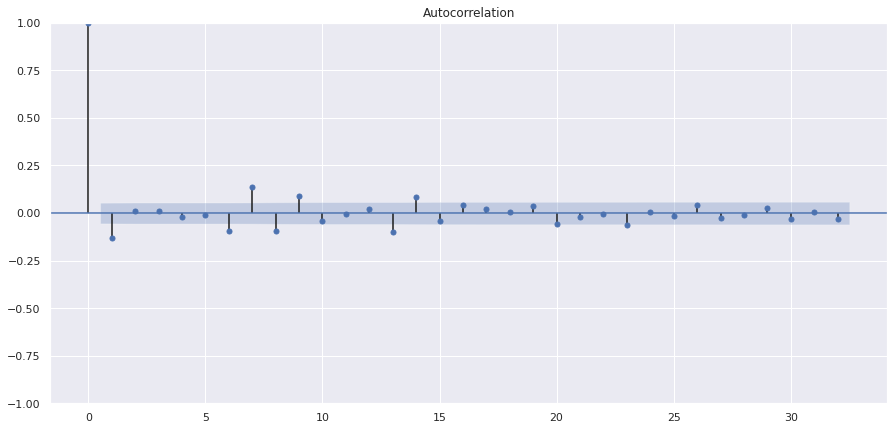

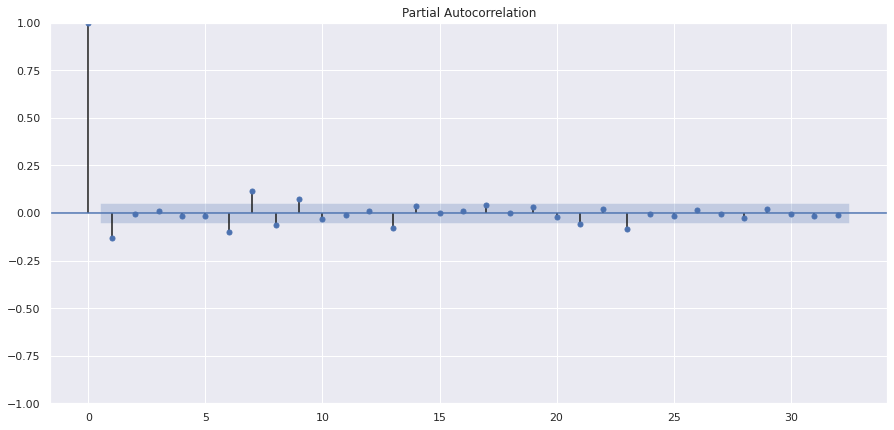

In [12]:
# Удостоверимся, что для ARMA-модели нет доступных параметров
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(returns)
plot_pacf(returns)
plt.show()

* Отсюда видно, что точно настроить на глаз параметры ARMA нельзя. Поэтому попробуем использовать GARCH для моделирования гетероскедастичности.

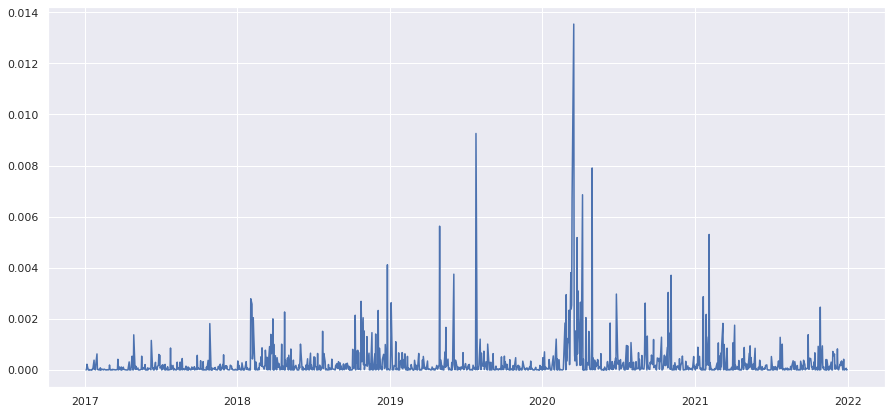

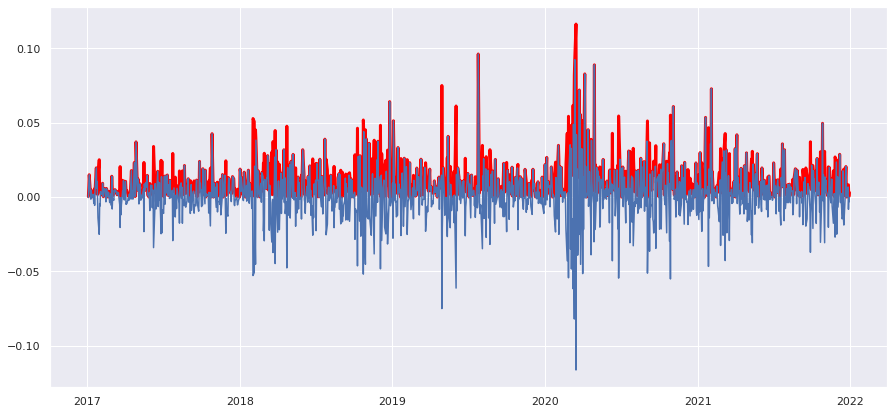

In [78]:
vol = returns**2
sigma = vol**(1/2)

plt.plot(vol)
plt.show()
plt.plot(np.sqrt(vol), color='red', linewidth=3)
plt.plot(returns)
plt.show()

In [54]:
from arch import arch_model
from tqdm import tqdm

best_aic = np.inf
best_p = 0
best_q = 0
for p in tqdm(range(1,5)):
  for q in range(1,5):
    model = arch_model(returns, mean='Zero', p=p, q=q).fit()
    if model.aic < best_aic:
      best_aic = model.aic
      best_p = p
      best_q = q

 50%|█████     | 2/4 [00:00<00:00,  9.31it/s]

Iteration:      1,   Func. Count:      5,   Neg. LLF: 782837387.5109283
Iteration:      2,   Func. Count:     12,   Neg. LLF: -398.5333985552586
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7950242.032861594
Iteration:      4,   Func. Count:     26,   Neg. LLF: -3603.304482608706
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3603.304482253119
            Iterations: 8
            Function evaluations: 26
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      5,   Neg. LLF: -3600.1588812251894
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3600.158888372308
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: -3599.893892424726
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3599.8938879463876
            Iterations: 5
            

 75%|███████▌  | 3/4 [00:00<00:00,  7.43it/s]

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3597.365792961995
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3597.3657960598257
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      8,   Neg. LLF: 944.9442694655195
Iteration:      2,   Func. Count:     18,   Neg. LLF: -3406.457033174715
Iteration:      3,   Func. Count:     27,   Neg. LLF: -3336.212873649862
Iteration:      4,   Func. Count:     35,   Neg. LLF: -3420.965101266713
Iteration:      5,   Func. Count:     43,   Neg. LLF: -3518.5122952573574
Iteration:      6,   Func. Count:     51,   Neg. LLF: -3584.931236611223
Iteration:      7,   Func. Count:     59,   Neg. LLF: -3599.3644555616575
Iteration:      8,   Func. Count:     67,   Neg. LLF: -3516.2551384016615
Iteration:      9,   Func. Count:     75,   Neg. LLF: -3599.914461460142
Iteration:     10,   Func. Count:     83,   Neg. LLF: -3605.

100%|██████████| 4/4 [00:00<00:00,  7.82it/s]

Iteration:      1,   Func. Count:      9,   Neg. LLF: 70571.85861790333
Iteration:      2,   Func. Count:     20,   Neg. LLF: -2520.0333949767883
Iteration:      3,   Func. Count:     31,   Neg. LLF: -3599.2858530549593
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3599.2858536175477
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     10,   Neg. LLF: 939900.8088738106
Iteration:      2,   Func. Count:     21,   Neg. LLF: -2520.0333949767883
Iteration:      3,   Func. Count:     33,   Neg. LLF: -3600.4185000054827
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3600.418500331046
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     10,   Neg. LLF: -3601.273450822435
Optimization terminated successfully    (Exit mode 0)
            Curr

In [55]:
best_model = arch_model(returns, mean='Zero', p=best_p, q=best_q).fit()
best_model.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 970.8251502444987
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3402.81196597819
Iteration:      3,   Func. Count:     25,   Neg. LLF: 83811193.42174487
Iteration:      4,   Func. Count:     32,   Neg. LLF: -3349.9563020121755
Iteration:      5,   Func. Count:     39,   Neg. LLF: -3094.757231617965
Iteration:      6,   Func. Count:     46,   Neg. LLF: -3563.087525278777
Iteration:      7,   Func. Count:     53,   Neg. LLF: -3598.287302872941
Iteration:      8,   Func. Count:     60,   Neg. LLF: -3586.2878466782486
Iteration:      9,   Func. Count:     67,   Neg. LLF: -3599.028712048228
Iteration:     10,   Func. Count:     74,   Neg. LLF: -3570.229643642092
Iteration:     11,   Func. Count:     81,   Neg. LLF: -3599.926102598941
Iteration:     12,   Func. Count:     88,   Neg. LLF: -3605.3397654738774
Iteration:     13,   Func. Count:     95,   Neg. LLF: -3605.8261666876638
Iteration:     14,   Func. Count:    101,   Neg. L

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3605.95
Distribution:                  Normal   AIC:                          -7201.90
Method:            Maximum Likelihood   BIC:                          -7176.05
                                        No. Observations:                 1302
Date:                Thu, Dec 08 2022   Df Residuals:                     1302
Time:                        20:02:44   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.4362e-05  4.298e-12  3.342e+06      0.000  [1.436e-05,1.436e-05]
alpha[1]       0.0779  1.973e-02      3.949  7.839e-05    [3.925e-02,  0.117]
alpha[2]       0.0318  3.063e-02      1.038      0.299 [-2.824e-02,9.181e-02]
beta[1]    1.9066e-14  6.725e-02  2.835e-13      1.000      [ -0.132,  0.132]
beta[2]        0.8358  4.543e-02     18.396  1.415e-75      [  0.747,  0.925]
=============================================================================

Covariance estimator: robust
"""

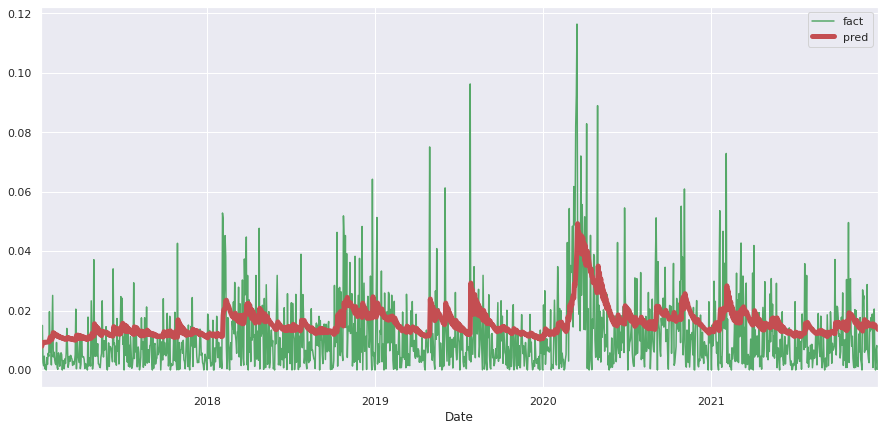

In [84]:
sigma.plot(color='g', label='fact')
best_model.conditional_volatility.plot(color='r', linewidth=5, label='pred')
plt.legend()
plt.show()